In [1]:
import geopandas as gpd
import pandas as pd
from simpledbf import Dbf5
from shapely.geometry import Point

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


In [2]:
gdf = gpd.read_file(r"C:\Users\bruno\Documents\J3Q3-4 BEP\repositories\poiinconcessie.shp")
gdf

,osm_id,code,fclass,name,geometry
0,21776807,2725,artwork,Hugo de Groot,MULTIPOINT (4.35979 52.01197)
1,25038839,2953,observation_tower,De Tureluur,MULTIPOINT (4.41081 51.98045)
2,25038839,2742,viewpoint,De Tureluur,MULTIPOINT (4.41081 51.98045)
3,26113742,2004,post_box,None,MULTIPOINT (4.35316 52.01497)
4,27298196,2301,restaurant,Eetcafé Hagedis,MULTIPOINT (4.29277 52.07845)
...,...,...,...,...,...
25784,7428908755,2741,picnic_site,None,MULTIPOINT (4.46151 52.07135)
25785,7430330852,2902,bench,None,MULTIPOINT (4.37262 52.08808)
25786,7431125124,2902,bench,None,MULTIPOINT (4.37059 52.09026)
25787,7437698438,2205,playground,None,MULTIPOINT (4.45659 51.98740)


In [4]:
geometries = []
berg = gdf.geometry.tolist()
for i in range(len(gdf.geometry.tolist())):
    l = [(p.x, p.y) for p in berg[i]]
    a = Point(l)
    geometries.append(a)
    #print(a)
geometries



 ...]

In [5]:
gdf.geometry = geometries
gdf

,osm_id,code,fclass,name,geometry
0,21776807,2725,artwork,Hugo de Groot,POINT (4.35979 52.01197)
1,25038839,2953,observation_tower,De Tureluur,POINT (4.41081 51.98045)
2,25038839,2742,viewpoint,De Tureluur,POINT (4.41081 51.98045)
3,26113742,2004,post_box,None,POINT (4.35316 52.01497)
4,27298196,2301,restaurant,Eetcafé Hagedis,POINT (4.29277 52.07845)
...,...,...,...,...,...
25784,7428908755,2741,picnic_site,None,POINT (4.46151 52.07135)
25785,7430330852,2902,bench,None,POINT (4.37262 52.08808)
25786,7431125124,2902,bench,None,POINT (4.37059 52.09026)
25787,7437698438,2205,playground,None,POINT (4.45659 51.98740)


In [6]:
gdf.to_file(r"C:\Users\bruno\Documents\J3Q3-4 BEP\repositories\poiinconcessieaspoints.shp")

In [10]:
gdf[gdf['fclass'] == 'supermarket'].to_file(r"C:\Users\bruno\Documents\J3Q3-4 BEP\repositories\supermarketsinconcessieaspoints.shp")

In [14]:
supermarkets = gdf[gdf['fclass'] == 'supermarket']
supermarkets

,osm_id,code,fclass,name,geometry
48,34044328,2501,supermarket,Albert Heijn XL,POINT (4.35602 51.86451)
49,34044379,2501,supermarket,Albert Heijn,POINT (4.21045 51.99331)
50,34044389,2501,supermarket,Albert Heijn,POINT (4.31731 51.97626)
51,34044390,2501,supermarket,Albert Heijn,POINT (4.26519 52.03464)
52,34044391,2501,supermarket,Albert Heijn,POINT (4.26090 51.91860)
...,...,...,...,...,...
25024,6901077377,2501,supermarket,Houtwijk,POINT (4.25072 52.05444)
25117,6964926432,2501,supermarket,Jumbo,POINT (4.35810 52.07554)
25141,6982353678,2501,supermarket,Dirk van den Broek,POINT (4.45983 51.91867)
25211,7036733525,2501,supermarket,Jumbo City,POINT (4.31073 52.07621)


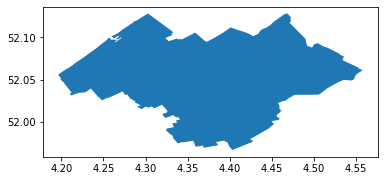

In [12]:
gdf1 = gpd.read_file(r"C:\Users\bruno\Documents\J3Q3-4 BEP\repositories\DenhaagDelftRijswijk.shp")
gdf1.plot()

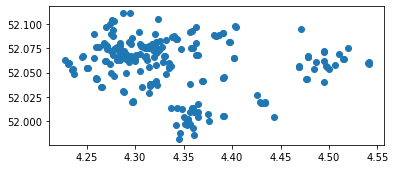

In [16]:
supermarkets1 = gpd.clip(supermarkets,gdf1)
supermarkets1.plot()

In [17]:
supermarkets1.to_file('supermarketsinregio.shp')